## Handling outliers with removal method

In [206]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [207]:
df = pd.read_csv('hepatitis.data', header=None)
df.tail(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2
154,1,43,1,2,2,1,2,2,2,2,1,1,1,2,1.20,100,19,3.1,42,2


In [208]:
df.columns = ["class", "age", "sex", "steroid", "antivirals","fatigue", "malaise", 
                 "anorexia", "liver_big","liver_firm", "spleen_palpable", "spiders", "ascites", 
                "varices", "bilirubin", "alk_phosphate", "sgot", 
               "albumin","protime", "histology"]
df.tail()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2
154,1,43,1,2,2,1,2,2,2,2,1,1,1,2,1.20,100,19,3.1,42,2


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            155 non-null    int64 
 1   age              155 non-null    int64 
 2   sex              155 non-null    int64 
 3   steroid          155 non-null    object
 4   antivirals       155 non-null    int64 
 5   fatigue          155 non-null    object
 6   malaise          155 non-null    object
 7   anorexia         155 non-null    object
 8   liver_big        155 non-null    object
 9   liver_firm       155 non-null    object
 10  spleen_palpable  155 non-null    object
 11  spiders          155 non-null    object
 12  ascites          155 non-null    object
 13  varices          155 non-null    object
 14  bilirubin        155 non-null    object
 15  alk_phosphate    155 non-null    object
 16  sgot             155 non-null    object
 17  albumin          155 non-null    ob

## Find Duplicates

In [210]:
df.duplicated().sum()

0

In [211]:
df.shape

(155, 20)

## Data Validation and Data Type Conversion

In [212]:
df= df.replace('?', np.NaN)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            155 non-null    int64 
 1   age              155 non-null    int64 
 2   sex              155 non-null    int64 
 3   steroid          154 non-null    object
 4   antivirals       155 non-null    int64 
 5   fatigue          154 non-null    object
 6   malaise          154 non-null    object
 7   anorexia         154 non-null    object
 8   liver_big        145 non-null    object
 9   liver_firm       144 non-null    object
 10  spleen_palpable  150 non-null    object
 11  spiders          150 non-null    object
 12  ascites          150 non-null    object
 13  varices          150 non-null    object
 14  bilirubin        149 non-null    object
 15  alk_phosphate    126 non-null    object
 16  sgot             151 non-null    object
 17  albumin          139 non-null    ob

In [214]:
df['class'] = df['class'].astype('str')
df.sex = df.sex.astype('str')
df.antivirals = df.antivirals.astype('str')
df.bilirubin = df.bilirubin.astype('float')
df.albumin = df.albumin.astype('float')
df.protime = df.protime.astype('float')
df.alk_phosphate = df.alk_phosphate.astype('float')
df.sgot = df.sgot.astype('float')
df.histology = df.histology.astype('str')

In [215]:
df.shape

(155, 20)

## Outliers

In [216]:
df.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


### Age

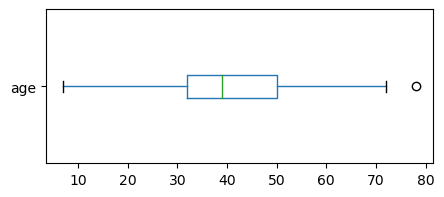

In [217]:
df.boxplot(column='age', fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [218]:
LB = df['age'].quantile(0.01)
UB = df['age'].quantile(0.99)

print('Lower Bound:',LB)
print('Upper Bound:',UB)

Lower Bound: 20.0
Upper Bound: 70.92000000000002


In [219]:
df[(df['age'] < LB) | (df['age'] > UB)]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.0,32.0,4.0,NaN,1
110,2,7,1,2,2,2,2,2,2,1,1,2,2,2,0.7,256.0,25.0,4.2,NaN,2
133,2,72,1,2,1,1,2,2,2,1,2,2,2,2,1.0,115.0,52.0,3.4,50.0,2


#### Start removing

In [220]:
no_outliers = df[~((df['age'] < LB) | (df['age'] > UB))]

In [221]:
df[~((df['age'] < LB) | (df['age'] > UB))]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.0,42.0,3.5,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,NaN,200.0,4.0,NaN,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95.0,28.0,4.0,75.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81.0,19.0,4.1,48.0,2


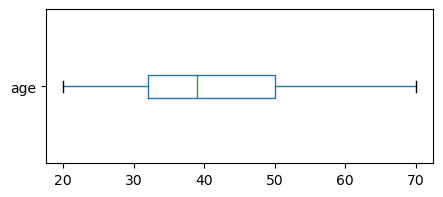

In [222]:
no_outliers.boxplot(column='age', fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### bilirubin

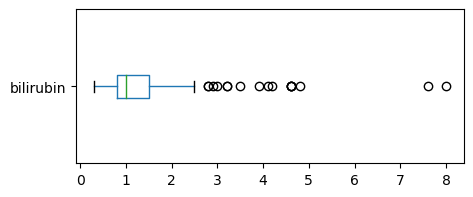

In [223]:
no_outliers.boxplot(column='bilirubin', fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [224]:
LB = no_outliers['bilirubin'].quantile(0.01)
UB = no_outliers['bilirubin'].quantile(0.99)

print('Lower Bound:',LB)
print('Upper Bound:',UB)

Lower Bound: 0.4
Upper Bound: 6.340000000000032


In [225]:
no_outliers[(no_outliers['bilirubin'] < LB) | (no_outliers['bilirubin'] > UB)]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
39,2,65,1,2,2,1,1,2,2,1,1,1,1,2,0.3,180.0,53.0,2.9,74.0,2
131,1,31,1,1,2,1,1,1,2,2,1,2,2,2,8.0,NaN,101.0,2.2,NaN,2
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,NaN,242.0,3.3,50.0,2


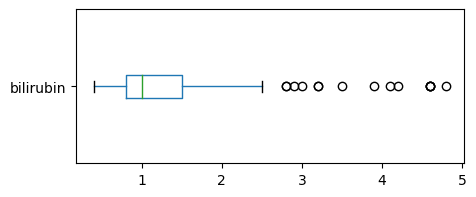

In [226]:
no_outliers = no_outliers[~((no_outliers['bilirubin'] < LB) | (no_outliers['bilirubin'] > UB))]
no_outliers.boxplot(column='bilirubin',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### alk_phosphate

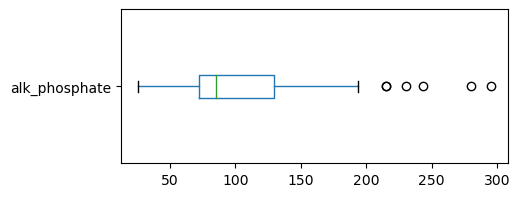

In [227]:
no_outliers.boxplot(column='alk_phosphate',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [228]:
LB = no_outliers['alk_phosphate'].quantile(0.01)
UB = no_outliers['alk_phosphate'].quantile(0.99)

print('Lower Bound:',LB)
print('Upper Bound:',UB)

Lower Bound: 30.84
Upper Bound: 272.2299999999997


In [229]:
no_outliers[(no_outliers.alk_phosphate < LB) | (no_outliers.alk_phosphate > UB)] 

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
30,1,39,1,1,1,1,1,2,2,1,2,2,2,2,2.3,280.0,98.0,3.8,40.0,1
60,2,37,1,2,2,2,2,2,2,2,2,2,2,2,0.7,26.0,58.0,4.5,100.0,1
77,2,34,2,1,1,2,2,2,2,1,2,2,2,2,0.6,30.0,24.0,4.0,76.0,1
140,2,36,1,1,2,1,1,1,1,1,2,1,2,1,1.7,295.0,60.0,2.7,NaN,2


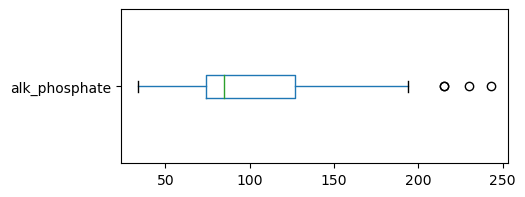

In [230]:
no_outliers = no_outliers[~((no_outliers['alk_phosphate'] < LB) | (no_outliers['alk_phosphate'] > UB))]
no_outliers.boxplot(column='alk_phosphate',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### sgot

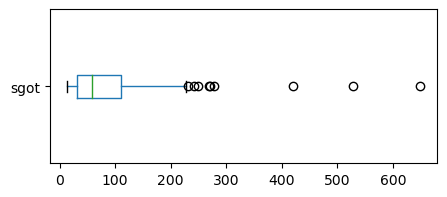

In [231]:
no_outliers.boxplot(column='sgot',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [232]:
LB = no_outliers['sgot'].quantile(0.01)
UB = no_outliers['sgot'].quantile(0.99)

print('Lower Bound:',LB)
print('Upper Bound:',UB)

Lower Bound: 14.4
Upper Bound: 484.7999999999994


In [233]:
no_outliers[(no_outliers.sgot < LB) | (no_outliers.sgot > UB)] 

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
38,2,42,1,1,2,2,2,2,2,2,2,2,2,2,1.0,85.0,14.0,4.0,100.0,1
80,2,23,1,2,2,1,1,1,2,2,2,2,2,2,0.8,NaN,14.0,4.8,NaN,1
107,2,45,1,1,2,1,1,1,2,2,2,2,2,2,2.3,NaN,648.0,NaN,NaN,2
147,1,70,1,1,2,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1.7,109.0,528.0,2.8,35.0,2


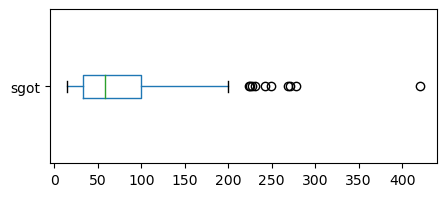

In [234]:
no_outliers = no_outliers[~((no_outliers['sgot'] < LB) | (no_outliers['sgot'] > UB))]
no_outliers.boxplot(column='sgot',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### albumin

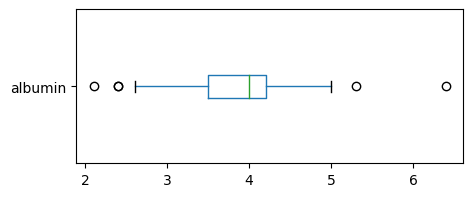

In [235]:
no_outliers.boxplot(column='albumin',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [236]:
LB = no_outliers['albumin'].quantile(0.01)
UB = no_outliers['albumin'].quantile(0.99)

print('Lower Bound:',LB)
print('Upper Bound:',UB)

Lower Bound: 2.4
Upper Bound: 5.225


In [237]:
no_outliers[(no_outliers.albumin < LB) | (no_outliers.albumin > UB)]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
74,2,50,1,2,2,2,2,2,2,2,2,2,2,2,1.5,100.0,100.0,5.3,NaN,1
104,1,47,1,2,2,1,1,2,2,1,2,2,1,1,1.7,86.0,20.0,2.1,46.0,2
105,2,25,1,2,2,2,2,2,2,2,2,2,2,2,0.6,NaN,34.0,6.4,NaN,2


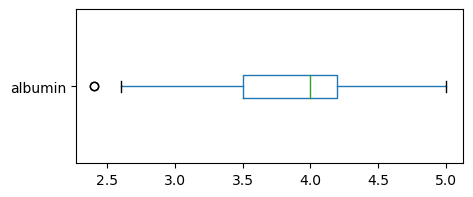

In [238]:
no_outliers = no_outliers[~((no_outliers['albumin'] < LB) | (no_outliers['albumin'] > UB))]
no_outliers.boxplot(column='albumin',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### protime

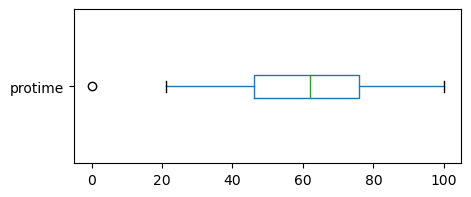

In [239]:
no_outliers.boxplot(column='protime',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [240]:
LB = no_outliers['protime'].quantile(0.01)
UB = no_outliers['protime'].quantile(0.99)

print('Lower Bound:',LB)
print('Upper Bound:',UB)

Lower Bound: 16.380000000000003
Upper Bound: 100.0


In [241]:
no_outliers[(no_outliers.protime < LB) | (no_outliers.protime > UB)]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
130,2,54,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85.0,30.0,4.5,0.0,2


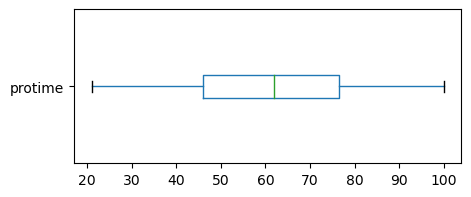

In [242]:
no_outliers = no_outliers[~((no_outliers['protime'] < LB) | (no_outliers['protime'] > UB))]
no_outliers.boxplot(column='protime',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [243]:
len(no_outliers)

137

In [244]:
(len(no_outliers)/len(df))*100

88.38709677419355

In [245]:
(len(df)-len(no_outliers))/len(df)*100

11.612903225806452

#### After eliminating the outliers, there are 88.38% of the data remaining for the classification model. It can be said that 11.62% of outliers have been identified using the percentile (99th).

In [246]:
no_outliers.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,137.000000,131.000000,113.000000,133.000000,122.000000,78.000000
mean,40.766423,1.362595,102.017699,81.481203,3.817213,62.461538
std,11.603285,0.994936,44.545719,69.195551,0.563591,21.826168
min,20.000000,0.400000,34.000000,15.000000,2.400000,21.000000
25%,32.000000,0.800000,72.000000,33.000000,3.500000,46.000000
50%,39.000000,1.000000,85.000000,59.000000,4.000000,62.000000
75%,50.000000,1.500000,130.000000,110.000000,4.200000,76.500000
max,69.000000,4.800000,243.000000,420.000000,5.000000,100.000000


In [247]:
no_outliers.alk_phosphate = no_outliers.alk_phosphate.round().astype(float)
no_outliers.sgot = no_outliers.sgot.round().astype(float)
no_outliers.protime = no_outliers.protime.round().astype(float)
no_outliers.bilirubin = np.round(df.bilirubin,2)
no_outliers.albumin = np.round(df.albumin,2)
no_outliers.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.0,42.0,3.5,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,NaN,200.0,4.0,NaN,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95.0,28.0,4.0,75.0,1


In [248]:
# saving the dataframe
no_outliers.to_csv('hepatitis6_outlier_percentile_remove.csv', index=False)